# Douglas Fir Project
Goal: Perform exploratory data analysis on Douglas Fir tree ring data to identify patterns, trends, and anomalies. Get unique latitudes and longitudes of the data points so we can run GEE scripts later.

Please refere to DataRAW folder for raw data files and documentation.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# read all the data files in the directory and combine them into a single dataframe
psme_metadata_df = pd.read_csv('dataRAW/or_psme_metadata.csv')
psme_rwl_df = pd.read_csv('dataRAW/or_psme_rwl.csv')

In [5]:
psme_metadata_df

,CN,FIELD_ID,FIELD_TAG_NUMBER,STATECD,COUNTYCD,FIADBPLOT,SUBP,TREE,SPCD,DIA,...,RINGCOUNT,METHOD,crossdated,CRN,R,VERIFY,REVISIT,CD_NOTES,INITIALS,DATE
0,17T16,8516,929,41,1,91729,1,302,202,26.6,...,156.0,skippy,y,id029,0.20,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
1,19T106,7759,400,41,1,53005,3,527,202,10.6,...,78.0,skippy,y,id036,0.28,y,n,NaN,CIM,NaN
2,19T107,8316,770,41,1,66620,1,518,202,6.7,...,26.0,scan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T108,7855,404,41,1,83747,3,506,202,22.1,...,112.0,scan,y,id036,0.44,y,n,"very distorted rigns at the end of the sample,...",NaN,NaN
4,21T75,7037,718,41,1,62549,3,130,202,6.1,...,20.0,scan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,20T135,8529,536,41,71,74244,1,5,202,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,20T136,8431,922,41,71,87675,4,143,202,16.9,...,32.0,scan,n,central_or_cascades,-0.02,n,y,too small to sdate,NaN,NaN
498,21T210,8998,870,41,71,54895,2,105,202,11.9,...,27.0,scan,n,central_or_cascades,0.29,y,n,too small to xdate,NaN,NaN
499,21T211,8901,3,41,71,70330,1,136,202,9.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
psme_rwl_df

,Year,CN,RW
0,1864,17T16,1.30
1,1865,17T16,1.40
2,1866,17T16,1.70
3,1867,17T16,1.72
4,1868,17T16,2.01
...,...,...,...
22032,2016,21T94,3.39
22033,2017,21T94,2.93
22034,2018,21T94,2.73
22035,2019,21T94,4.43


In [3]:
merged = psme_rwl_df.merge(
    psme_metadata_df,
    on="CN",
    how="left",
    validate="m:1"
)

In [4]:
merged

,Year,CN,RW,FIELD_ID,FIELD_TAG_NUMBER,STATECD,COUNTYCD,FIADBPLOT,SUBP,TREE,...,RINGCOUNT,METHOD,crossdated,CRN,R,VERIFY,REVISIT,CD_NOTES,INITIALS,DATE
0,1864,17T16,1.30,8516,929,41,1,91729,1,302,...,156.0,skippy,y,id029,0.2,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
1,1865,17T16,1.40,8516,929,41,1,91729,1,302,...,156.0,skippy,y,id029,0.2,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
2,1866,17T16,1.70,8516,929,41,1,91729,1,302,...,156.0,skippy,y,id029,0.2,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
3,1867,17T16,1.72,8516,929,41,1,91729,1,302,...,156.0,skippy,y,id029,0.2,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
4,1868,17T16,2.01,8516,929,41,1,91729,1,302,...,156.0,skippy,y,id029,0.2,n,y,cannot estimate dtp rings hard to visuazlize n...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22032,2016,21T94,3.39,10404,863,41,7,91340,1,100,...,52.0,scan,y,central_or_cascades,0.3,y,n,not enough curvature to estimate dtp,NaN,NaN
22033,2017,21T94,2.93,10404,863,41,7,91340,1,100,...,52.0,scan,y,central_or_cascades,0.3,y,n,not enough curvature to estimate dtp,NaN,NaN
22034,2018,21T94,2.73,10404,863,41,7,91340,1,100,...,52.0,scan,y,central_or_cascades,0.3,y,n,not enough curvature to estimate dtp,NaN,NaN
22035,2019,21T94,4.43,10404,863,41,7,91340,1,100,...,52.0,scan,y,central_or_cascades,0.3,y,n,not enough curvature to estimate dtp,NaN,NaN


In [8]:
rw_wide = merged.pivot_table(
    index="CN",
    columns="Year",
    values="RW",
    aggfunc="first"
)

# Add metadata
meta_indexed = psme_metadata_df.set_index("CN")
merged_wide = meta_indexed.join(rw_wide, how="left")

In [9]:
merged_wide

,FIELD_ID,FIELD_TAG_NUMBER,STATECD,COUNTYCD,FIADBPLOT,SUBP,TREE,SPCD,DIA,MEAS_YEAR,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CN,,,,,,,,,,,,,,,,,,,,,
17T16,8516,929,41,1,91729,1,302,202,26.6,2017,...,1.40,1.06,1.04,1.24,0.96,1.03,NaN,NaN,NaN,NaN
19T106,7759,400,41,1,53005,3,527,202,10.6,2019,...,3.20,2.29,2.56,2.87,2.24,2.32,1.90,NaN,NaN,NaN
19T107,8316,770,41,1,66620,1,518,202,6.7,2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19T108,7855,404,41,1,83747,3,506,202,22.1,2019,...,2.24,0.92,1.44,1.49,0.98,1.45,0.84,NaN,NaN,NaN
21T75,7037,718,41,1,62549,3,130,202,6.1,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20T135,8529,536,41,71,74244,1,5,202,5.4,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20T136,8431,922,41,71,87675,4,143,202,16.9,2020,...,2.93,2.85,2.61,1.60,0.83,0.61,1.23,1.37,NaN,NaN
21T210,8998,870,41,71,54895,2,105,202,11.9,2021,...,2.91,2.63,2.39,1.86,1.64,1.57,2.34,2.60,2.94,NaN


In [ ]:
# Calculate the difference between the outer year and the maximum ring width year for each core
# This is a sanity/consistency check on each core’s dating and ring-width time series.
# If diff is 0, the widest ring is the outermost ring; nothing odd detected.
# If diff is negative, the largest ring was deeper in the core (older). That’s expected in many trees but worth scanning for unusual offsets.
# If diff is positive, the largest ring is outside the outermost ring, which is impossible and indicates an error.
merged.groupby("CN").agg(
    outer=("OUTER_YEAR","first"),
    max_rw=("Year","max")
).assign(diff=lambda d: d.max_rw - d.outer).head()

,outer,max_rw,diff
CN,,,
17T16,2017.0,2017,0.0
17T18,2017.0,2017,0.0
17T19,2017.0,2017,0.0
17T21,2017.0,2017,0.0
17T22,2017.0,2017,0.0


In [ ]:
# Check unexpected gaps in ring-width sequences
# A gap is defined as any missing year(s) between the first and last recorded year for a core.
def find_gaps(group):
    years = sorted(group["Year"])
    gaps = np.diff(years) - 1
    return gaps[gaps > 0]

merged.groupby("CN").apply(find_gaps)

/var/folders/9n/72lj2wk90kl7ycj6f6kj9xdr0000gn/T/ipykernel_46666/3828984535.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby("CN").apply(find_gaps)


CN
17T16    []
17T18    []
17T19    []
17T21    []
17T22    []
         ..
21T87    []
21T88    []
21T91    []
21T92    []
21T94    []
Length: 242, dtype: object

In [9]:
# 1) unique FIA plot coordinates
plot_coords = (
    merged[[
        "STATECD", "COUNTYCD", "FIADBPLOT",
        "LAT_FUZZED", "LON_FUZZED"
    ]]
    .dropna(subset=["LAT_FUZZED", "LON_FUZZED"])
    .drop_duplicates(subset=["STATECD","COUNTYCD","FIADBPLOT"])
    .reset_index(drop=True)
)

# 2) round for stability (optional but fine)
plot_coords = plot_coords.assign(
    LAT = plot_coords["LAT_FUZZED"].round(5),
    LON = plot_coords["LON_FUZZED"].round(5)
)

# 3) save
plot_coords[["STATECD","COUNTYCD","FIADBPLOT","LAT","LON"]].to_csv(
    "dataRAW/psme_plot_coords_for_gee.csv",
    index=False
)

PSME cores cluster strongly in western Oregon (dense west-side Cascades) with a smaller, more scattered group in eastern Oregon/Washington. AS EXPECTED

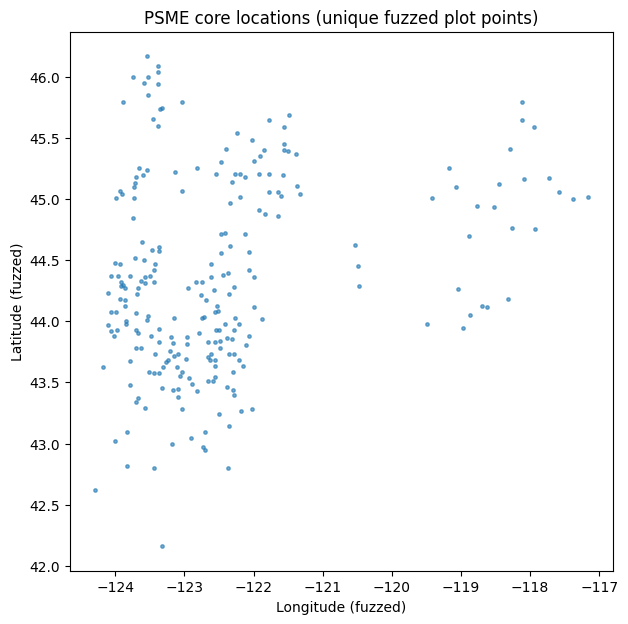

In [10]:
# sanity check before GEE. Plot the unique fuzzed coordinates
plot_coords = plot_coords.drop_duplicates(["LAT_FUZZED","LON_FUZZED"])

plt.figure(figsize=(7,7))
plt.scatter(plot_coords["LON_FUZZED"], plot_coords["LAT_FUZZED"], s=6, alpha=0.6)
plt.xlabel("Longitude (fuzzed)")
plt.ylabel("Latitude (fuzzed)")
plt.title("PSME core locations (unique fuzzed plot points)")
plt.show()


Most cores span 40–120 years with a long tail of exceptionally long series reaching 300–450 years, indicating a mix of younger stands and a smaller number of very old-growth trees in the dataset.

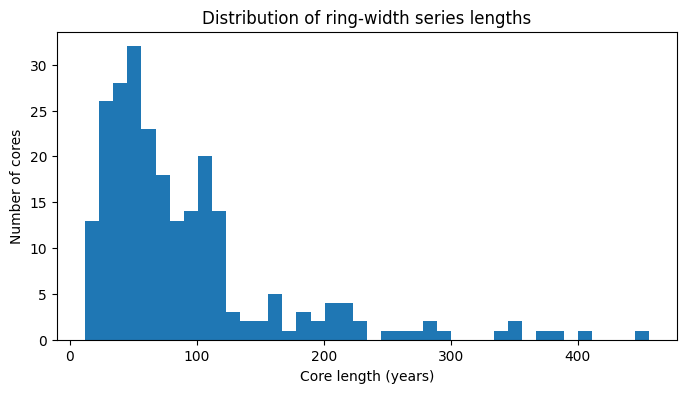

In [11]:
# distribution of series lengths (how long are cores)
series_len = merged.groupby("CN")["Year"].agg(
    start="min", end="max", n_years="count"
)
series_len["span"] = series_len["end"] - series_len["start"] + 1

plt.figure(figsize=(8,4))
plt.hist(series_len["span"], bins=40)
plt.xlabel("Core length (years)")
plt.ylabel("Number of cores")
plt.title("Distribution of ring-width series lengths")
plt.show()


Mean ring width shows long-term low growth through the 1600s–1800s, followed by a strong 20th-century increase and modern decline after ~2000, with wide variability indicating strong interannual climate sensitivity.

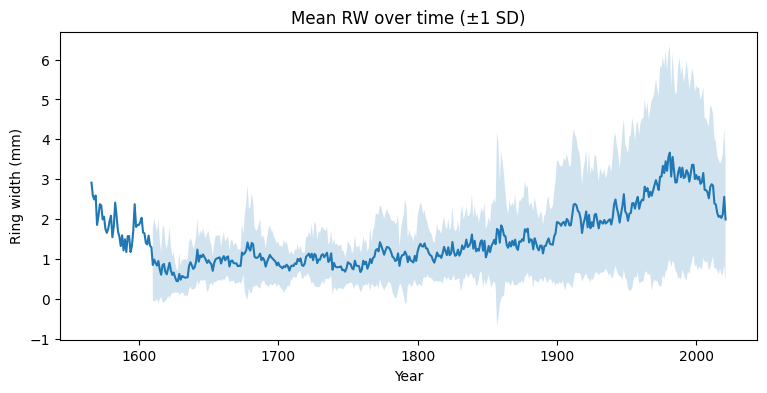

In [12]:
# ring-width trends over time (mean + spread)
rw_by_year = merged.groupby("Year")["RW"].agg(["mean","std","count"]).reset_index()

plt.figure(figsize=(9,4))
plt.plot(rw_by_year["Year"], rw_by_year["mean"])
plt.fill_between(
    rw_by_year["Year"],
    rw_by_year["mean"] - rw_by_year["std"],
    rw_by_year["mean"] + rw_by_year["std"],
    alpha=0.2
)
plt.xlabel("Year")
plt.ylabel("Ring width (mm)")
plt.title("Mean RW over time (±1 SD)")
plt.show()


Mean ring width declines sharply with elevation, showing fast growth at low–mid elevations (<1500 m) and progressively narrower rings at higher elevations, reflecting stronger temperature and moisture limitations.

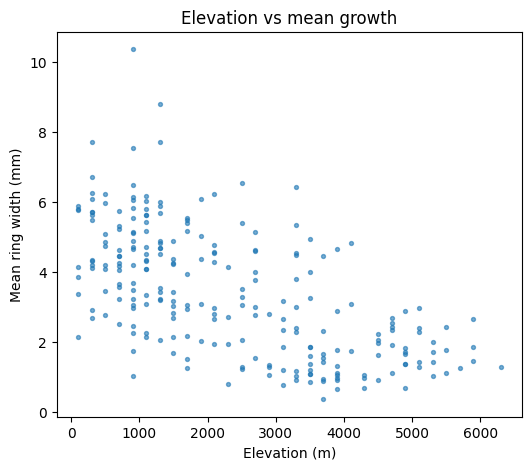

In [13]:
# elevation vs mean growth (ecological check)
cn_summary = merged.groupby("CN").agg(
    mean_rw=("RW","mean"),
    elev=("ELEV","first"),
    spcd=("SPCD","first")
).dropna()

plt.figure(figsize=(6,5))
plt.scatter(cn_summary["elev"], cn_summary["mean_rw"], s=8, alpha=0.6)
plt.xlabel("Elevation (m)")
plt.ylabel("Mean ring width (mm)")
plt.title("Elevation vs mean growth")
plt.show()


The ring-year coverage heatmap shows long, continuous tree-ring series with clean outer-year alignment and virtually no internal gaps, indicating high-quality, well-crossdated chronologies across sampled cores.

1566 2021


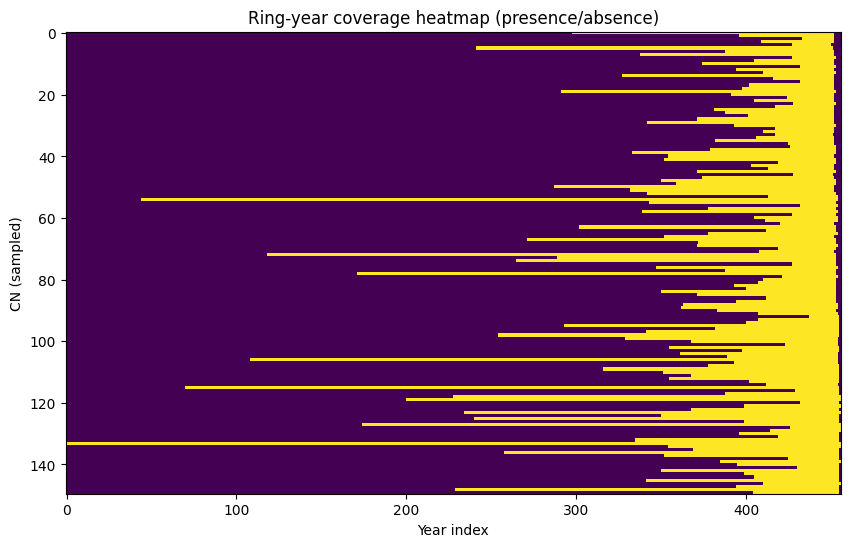

In [13]:
# time coverage heatmap by CN
# sample a subset
sample_cns = merged["CN"].drop_duplicates().sample(150, random_state=0)
sub = merged[merged["CN"].isin(sample_cns)]
# print lowerest and highest years
print(sub["Year"].min(), sub["Year"].max())
# pivot to presence/absence of years
presence = sub.assign(present=1).pivot_table(
    index="CN", columns="Year", values="present", fill_value=0
)

plt.figure(figsize=(10,6))
plt.imshow(presence, aspect="auto", interpolation="nearest")
plt.xlabel("Year index")
plt.ylabel("CN (sampled)")
plt.title("Ring-year coverage heatmap (presence/absence)")
plt.show()


In [14]:
presence

Year,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CN,,,,,,,,,,,,,,,,,,,,,
17T16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
17T19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
17T21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
17T22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
17T23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21T81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
21T84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21T87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


The unique core coordinates show two main sampling clusters—one dense region in western Oregon (−124 to −122°W, 43–46°N) and a smaller, more scattered cluster in eastern Oregon/Washington—indicating a spatially bimodal dataset concentrated heavily in the west-side Cascades.

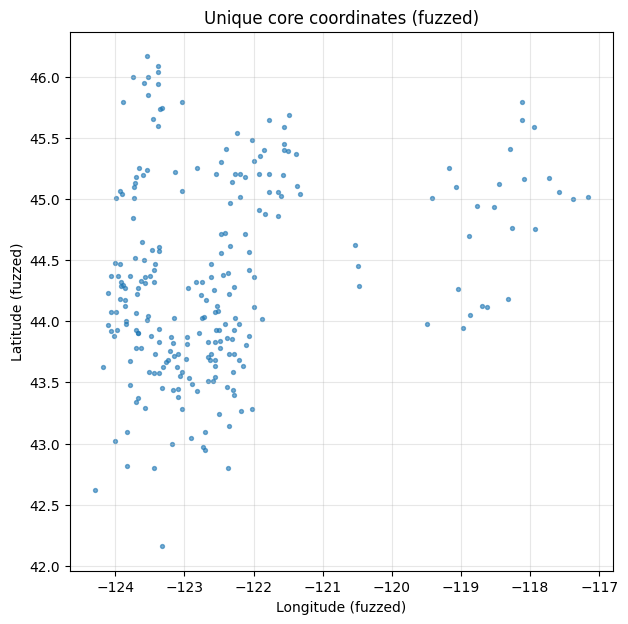

In [15]:
# one row per CN
coords = (
    merged[["CN", "LAT_FUZZED", "LON_FUZZED"]]
    .dropna()
    .drop_duplicates("CN")
)

plt.figure(figsize=(7,7))
plt.scatter(coords["LON_FUZZED"], coords["LAT_FUZZED"], s=8, alpha=0.6)
plt.xlabel("Longitude (fuzzed)")
plt.ylabel("Latitude (fuzzed)")
plt.title("Unique core coordinates (fuzzed)")
plt.grid(alpha=0.3)
plt.show()


Elevation increases steadily from west to east, with low- to mid-elevation coastal/Cascade foothill plots around −124 to −122° W and much higher elevation sites (up to >6000 m) concentrated in eastern Oregon and SE Washington, highlighting a strong west–east ecological gradient in the sampling.

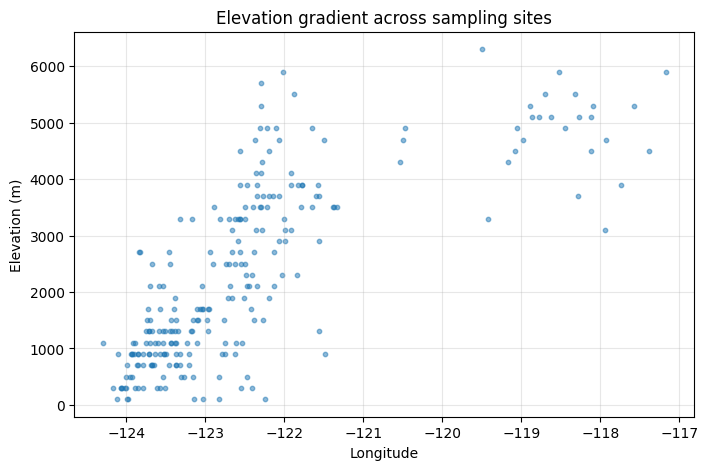

In [16]:
coords_elev = (
    merged[["CN","LAT_FUZZED","LON_FUZZED","ELEV"]]
    .dropna()
    .drop_duplicates("CN")
)

plt.figure(figsize=(8,5))
plt.scatter(coords_elev["LON_FUZZED"], coords_elev["ELEV"], s=10, alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Elevation (m)")
plt.title("Elevation gradient across sampling sites")
plt.grid(alpha=0.3)
plt.show()


Sampling density is highest in the central/western Oregon Cascades (~44–45°N, -124 to -122°W), moderate in the Mt. Hood region, and lower but present across eastern Oregon/SE Washington, indicating a dataset strongly concentrated in west-side mid-elevation forests with sparser east-side representation.

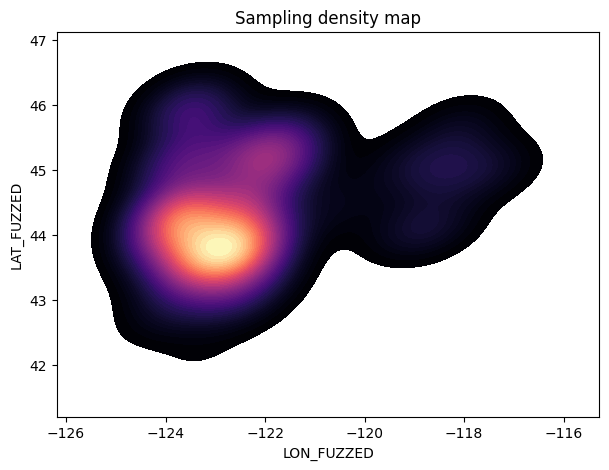

In [17]:
plt.figure(figsize=(7,5))
sns.kdeplot(
    x=coords["LON_FUZZED"],
    y=coords["LAT_FUZZED"],
    fill=True,
    cmap="magma",
    levels=50,
    thresh=0.02
)
plt.title("Sampling density map")
plt.show()
